# Principal Component Analysis (PCA)


*   Dimensionality Reduction Technique
*   Using Singular Value Decomposition
*   Author: [Anniebhalla16](https://github.com/Anniebhalla16)





In [2]:
import numpy as np
import pandas as pd

In [51]:
class PCA:
  def __init__(self, n_components) -> None:
    self.n_components= n_components
    self.components = None
    self.variance_ratio = None
    self.all_eigenvalues= None
    self.mean= None


  def fit(self, X):
    # to subtract the mean from the data i.e. mean centering
    self.mean = np.mean(X, axis=0)
    X = X- self.mean

    # calculate covariance
    # Transpose because this function needs samples as columns
    cov = np.cov(X.T)

    # calculate eigevectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(cov)

    # eigenvectors v = [:, i] = column vetor, transpose for easier calculations later on
    eigenvectors = eigenvectors.T

    # sort eigenvectors according to eigenvalues
    indices =np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[indices]
    eigenvectors = eigenvectors[indices]

    # Save sorted eigenvalues for scree plot
    self.all_eigenvalues = eigenvalues
    self.variance_ratio = eigenvalues / np.sum(eigenvalues)

    # save only first n_components (easier bcz we transposed earlier)
    self.components = eigenvectors[:self.n_components]

# could be same data or new testing data
  def transform(self, X):
    X = X - self.mean
    # project the data , here projection only simply means dots product
    return np.dot(X, self.components.T)

Shape of X:  (150, 4)
Shape of transformed X:  (150, 2)


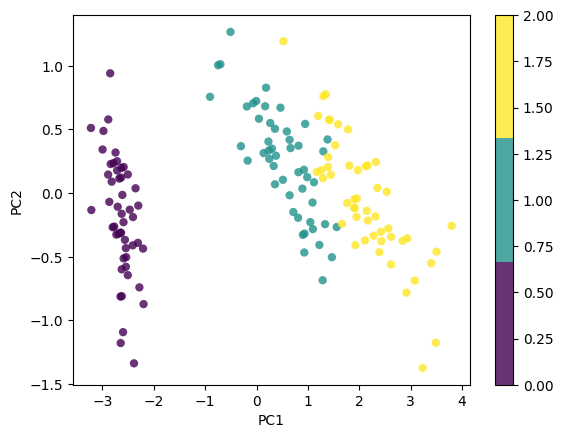

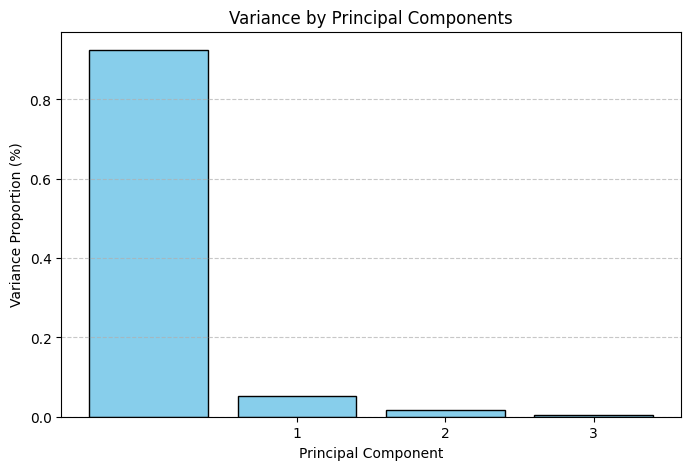

In [52]:
if __name__ == "__main__":
  import matplotlib.pyplot as plt
  from sklearn import datasets

  data= datasets.load_iris()
  X = data.data
  y = data.target

  pca = PCA(2)
  pca.fit(X)
  X_projected = pca.transform(X)

  print("Shape of X: ", X.shape)
  print("Shape of transformed X: ", X_projected.shape)

  x1 = X_projected[:,0]
  x2 = X_projected[:,1]

  plt.scatter(x1, x2, c=y, marker ="o", edgecolors="none", alpha=0.8, cmap = plt.get_cmap("viridis",3))

  plt.xlabel("PC1")
  plt.ylabel("PC2")
  plt.colorbar()
  plt.show()

  # Bar plot of variance percentages i.e Scree Plot
  plt.figure(figsize=(8, 5))
  plt.bar(
      x = range(len(pca.variance_ratio)),
      height = pca.variance_ratio,
      width= 0.8,
      color='skyblue',
      edgecolor='black'
  )
  plt.title("Variance by Principal Components")
  plt.xlabel("Principal Component")
  plt.ylabel("Variance Proportion (%)")
  plt.xticks(range(1, len(pca.variance_ratio)))
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()
